importing important libraries

In [1]:

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as matplot

import re
import sklearn

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

In [2]:
print(pd.__version__)

1.1.5


dataset

In [3]:
url1 = 'https://raw.githubusercontent.com/cadventure19/Diebettes-detection-model/master/examination.csv'
url2 = 'https://raw.githubusercontent.com/cadventure19/Diebettes-detection-model/master/labs.csv'
df1 = pd.read_csv(url1)
df2 = pd.read_csv(url2)

In [4]:
df1.drop(['SEQN'], axis = 1, inplace=True)
df2.drop(['SEQN'], axis = 1, inplace=True)

In [5]:
df = pd.concat([df1, df2], axis=1, join='inner')

In [6]:
df.describe()

,PEASCST1,PEASCTM1,PEASCCT1,BPXCHR,BPAARM,BPACSZ,BPXPLS,BPXPULS,BPXPTY,BPXML1,BPXSY1,BPXDI1,BPAEN1,BPXSY2,BPXDI2,BPAEN2,BPXSY3,BPXDI3,BPAEN3,BPXSY4,BPXDI4,BPAEN4,BMDSTATS,BMXWT,BMIWT,BMXRECUM,BMIRECUM,BMXHEAD,BMIHEAD,BMXHT,BMIHT,BMXBMI,BMDBMIC,BMXLEG,BMILEG,BMXARML,BMIARML,BMXARMC,BMIARMC,BMXWAIST,...,URXUMMA,URDUMMAL,URXVOL1,URDFLOW1,URXVOL2,URDFLOW2,URXVOL3,URDFLOW3,URXUHG,URDUHGLC,URXUBA,URDUBALC,URXUCD,URDUCDLC,URXUCO,URDUCOLC,URXUCS,URDUCSLC,URXUMO,URDUMOLC,URXUMN,URDUMNLC,URXUPB,URDUPBLC,URXUSB,URDUSBLC,URXUSN,URDUSNLC,URXUSR,URDUSRLC,URXUTL,URDUTLLC,URXUTU,URDUTULC,URXUUR,URDUURLC,URXPREG,URXUAS,LBDB12,LBDB12SI
count,9813.000000,9508.000000,320.000000,1961.000000,7535.000000,7542.000000,7549.000000,9511.000000,7564.000000,7553.000000,7172.000000,7172.000000,7539.000000,7409.000000,7409.000000,7537.000000,7408.000000,7408.000000,7537.000000,515.000000,515.000000,562.000000,9813.000000,9723.000000,384.000000,1065.000000,31.0,229.000000,0.0,9067.000000,221.000000,9055.000000,3523.000000,7402.000000,350.0,9301.000000,368.0,9301.000000,372.0,8661.000000,...,2654.000000,2654.000000,8057.000000,7150.000000,1856.000000,1855.000000,99.000000,99.000000,2666.000000,2666.000000,2664.000000,2664.000000,2664.000000,2664.000000,2664.000000,2664.000000,2664.000000,2664.0,2664.000000,2664.0,2664.000000,2664.000000,2664.000000,2664.000000,2664.000000,2664.000000,2664.000000,2664.000000,2664.000000,2664.000000,2664.000000,2664.000000,2664.000000,2664.000000,2664.000000,2664.000000,1261.000000,2662.000000,5316.000000,5316.000000
mean,1.064914,660.584034,57.828125,105.534931,1.008096,3.675418,74.416214,1.013668,1.004363,144.673640,118.123536,65.769939,1.988725,118.230530,65.237954,1.953960,117.999460,65.035637,1.963381,125.666019,69.013592,1.879004,1.139916,62.599054,2.966146,81.631174,1.0,41.566812,NaN,155.883759,2.647059,25.678244,2.488504,38.577709,1.0,33.141006,1.0,28.485765,1.0,87.272047,...,0.621420,0.295403,109.113069,0.907887,118.483297,1.255776,96.343434,1.775141,0.506489,0.335709,1.768477,0.002628,0.242220,0.181306,0.624201,0.000751,4.967304,0.0,56.102215,0.0,0.160595,0.695195,0.460113,0.010511,0.075613,0.224850,1.441414,0.094595,118.066184,0.000375,0.186950,0.007883,0.150535,0.162162,0.012038,0.177177,1.969072,15.670639,640.100263,472.394865
std,0.354007,275.431642,30.788160,21.516295,0.116644,0.786221,12.367969,0.116116,0.065911,36.583686,18.078149,14.960108,0.105589,18.181197,15.700239,0.209585,18.079852,16.233174,0.187838,22.608087,15.806398,0.326414,0.499377,32.331616,0.480861,14.219097,0.0,2.525734,NaN,23.176270,0.764171,7.955137,0.825881,4.047820,0.0,7.409420,0.0,7.961971,0.0,22.542605,...,0.688717,0.456310,82.487715,0.954769,93.150898,2.141072,83.380877,1.771576,2.041355,0.472326,3.004718,0.051203,0.364897,0.385344,1.782484,0.027395,3.143092,0.0,56.115836,0.0,0.485937,0.460411,0.766444,0.102000,0.141326,0.417562,4.711833,0.292709,182.793685,0.019375,0.133833,0.088452,0.576409,0.368669,0.034026,0.381890,0.251651,46.735936,751.967084,554.951537
min,1.000000,7.000000,1.000000,60.000000,1.000000,1.000000,40.000000,1.000000,1.000000,100.000000,66.000000,0.000000,1.000000,66.000000,0.000000,1.000000,62.000000,0.000000,1.000000,80.000000,0.000000,1.000000,1.000000,3.100000,1.000000,48.600000,1.0,33.800000,NaN,79.700000,1.000000,12.100000,1.000000,24.400000,1.0,9.900000,1.0,10.400000,1.0,40.200000,...,0.140000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,0.042000,0.090000,0.000000,0.042000,0.000000,0.025000,0.000000,0.016000,0.000000,0.387000,0.0,1.430000,0.0,0.092000,0.000000,0.020000,0.000000,0.016000,0.000000,0.064000,0.000000,1.655000,0.000000,0.013000,0.000000,0.013000,0.000000,0.001400,0.000000,1.000000,0.280000,18.000000,13.300000
25%,1.000000,578.000000,56.000000,88.000000,1.000000,3.000000,66.000000,1.000000,1.000000,130.000000,106.000000,58.000000,2.000000,106.000000,58.000000,2.000000,106.000000,58.000000,2.000000,108.000000,60.000000,2.000000,1.000000,37.950000,3.000000,69.700000,1.0,39.700000,NaN,149.500000,3

In [7]:
df.columns

Index(['PEASCST1', 'PEASCTM1', 'PEASCCT1', 'BPXCHR', 'BPAARM', 'BPACSZ',
       'BPXPLS', 'BPXPULS', 'BPXPTY', 'BPXML1',
       ...
       'URXUTL', 'URDUTLLC', 'URXUTU', 'URDUTULC', 'URXUUR', 'URDUURLC',
       'URXPREG', 'URXUAS', 'LBDB12', 'LBDB12SI'],
      dtype='object', length=646)

In [8]:
from sklearn.feature_selection import VarianceThreshold

df.dropna(axis=1, how='all')
df.dropna(axis=0, how='all')

df = df.rename(columns = {
                          'BMXARMC' : 'ArmCircum',
                          'BMDAVSAD' : 'SaggitalAbdominal',
                          'MGDCGSZ' : 'GripStrength',
                         })

Features selected for analysis

In [9]:
from sklearn.feature_selection import VarianceThreshold

df.dropna(axis=1, how='all')
df.dropna(axis=0, how='all')

df = df.rename(columns = {
                          'LBXGH' : 'GlycoHemoglobin',
                          'BMXARMC' : 'ArmCircum',
                          'BMDAVSAD' : 'SaggitalAbdominal',
                          'MGDCGSZ' : 'GripStrength'})

df = df.loc[:, ['GlycoHemoglobin', 'ArmCircum', 
                'SaggitalAbdominal', 'GripStrength']]

df.describe()

,GlycoHemoglobin,ArmCircum,SaggitalAbdominal,GripStrength
count,6643.000000,9301.000000,7218.000000,7677.000000
mean,5.642556,28.485765,21.114034,63.054891
std,1.004850,7.961971,4.963949,25.098439
min,3.500000,10.400000,10.100000,8.000000
25%,5.200000,22.600000,17.300000,45.600000
50%,5.400000,29.300000,20.700000,60.300000
75%,5.800000,34.000000,24.400000,80.700000
max,17.500000,59.400000,40.100000,162.800000


Filling up blank values

In [10]:
#GlycoHemoglobin, Saggital Abdominal(median)
df['GlycoHemoglobin'] = df['GlycoHemoglobin'].fillna(df['GlycoHemoglobin'].median())
df['ArmCircum'] = df['ArmCircum'].fillna(df['ArmCircum'].median())
df['SaggitalAbdominal'] = df['SaggitalAbdominal'].fillna(df['SaggitalAbdominal'].median())
df['GripStrength'] = df['GripStrength'].fillna(df['GripStrength'].median())
df.describe()

,GlycoHemoglobin,ArmCircum,SaggitalAbdominal,GripStrength
count,9813.000000,9813.000000,9813.000000,9813.000000
mean,5.564201,28.528248,21.004545,62.455233
std,0.834491,7.753571,4.261142,22.228196
min,3.500000,10.400000,10.100000,8.000000
25%,5.300000,23.200000,18.500000,50.300000
50%,5.400000,29.300000,20.700000,60.300000
75%,5.600000,33.800000,22.900000,73.300000
max,17.500000,59.400000,40.100000,162.800000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6664ef2f10>,
      dtype=object)

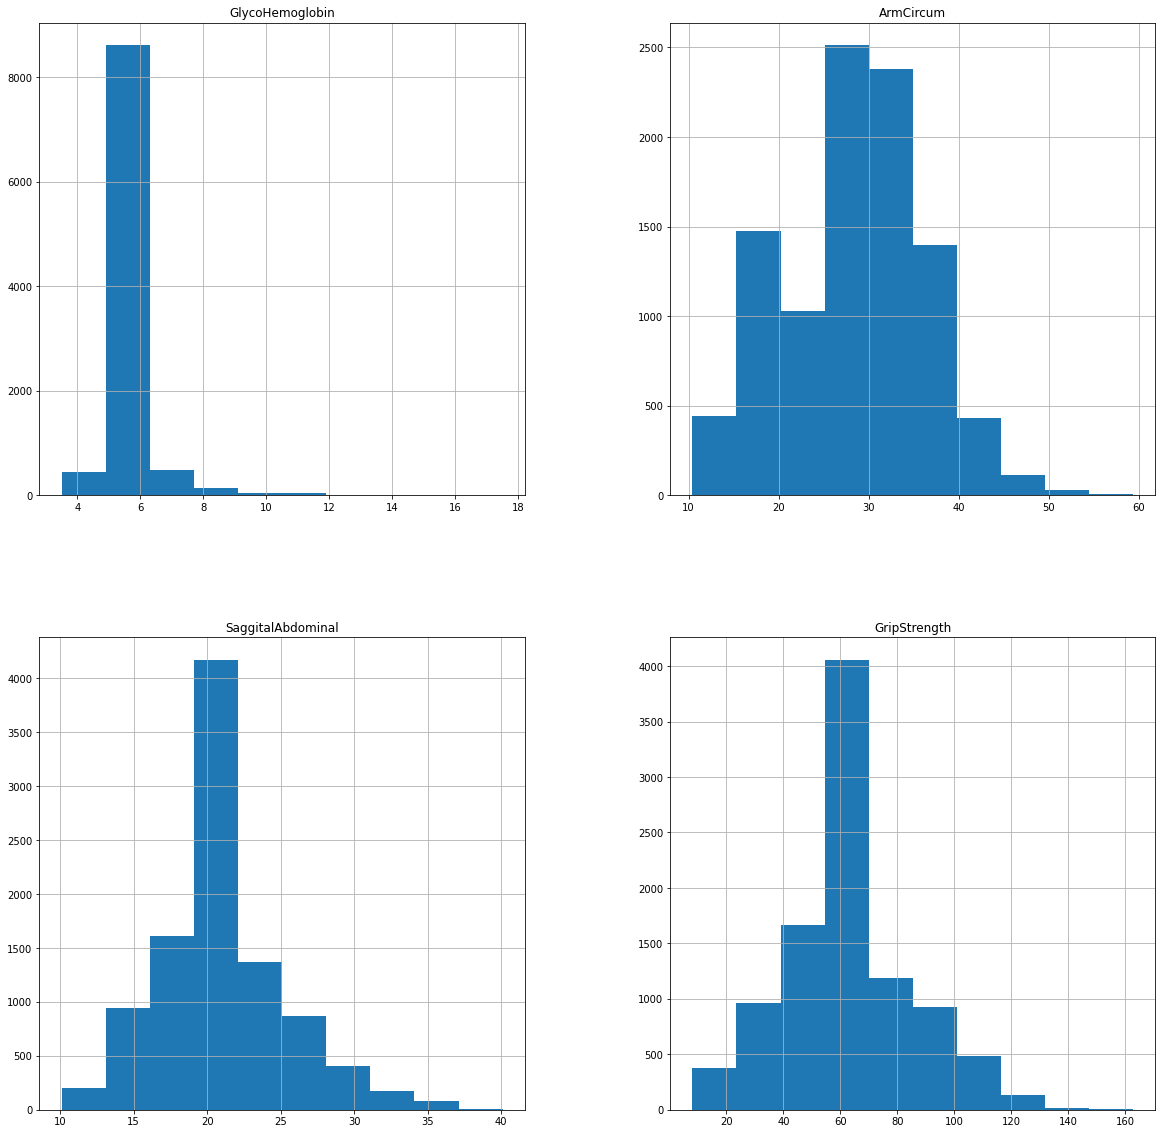

In [11]:
p = df.hist(figsize = (20,20))
p

Skewness
A left-skewed distribution has a long left tail. Left-skewed distributions are also called negatively-skewed distributions. That’s because there is a long tail in the negative direction on the number line. The mean is also to the left of the peak.

A right-skewed distribution has a long right tail. Right-skewed distributions are also called positive-skew distributions. That’s because there is a long tail in the positive direction on the number line. The mean is also to the right of the peak.
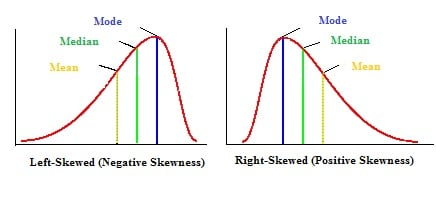


In [12]:
df.loc[df['GlycoHemoglobin'] < 6.0, 'Diabetes'] = 0
df.loc[(df['GlycoHemoglobin'] >= 6.0) & (df['GlycoHemoglobin'] <= 6.4), 'Diabetes'] = 1
df.loc[df['GlycoHemoglobin'] >= 6.5, 'Diabetes'] = 2

df.head(10)  

,GlycoHemoglobin,ArmCircum,SaggitalAbdominal,GripStrength,Diabetes
0,13.9,35.3,20.6,55.2,2.0
1,9.1,34.7,24.4,61.5,2.0
2,8.9,33.5,25.6,91.0,2.0
3,5.4,21.0,14.9,32.2,0.0
4,4.9,25.2,20.7,30.9,0.0
5,5.5,41.8,29.1,53.1,0.0
6,5.4,14.9,20.7,60.3,0.0
7,5.5,38.0,26.7,45.9,0.0
8,5.4,29.0,19.9,38.8,0.0
9,5.2,27.5,20.0,43.5,0.0


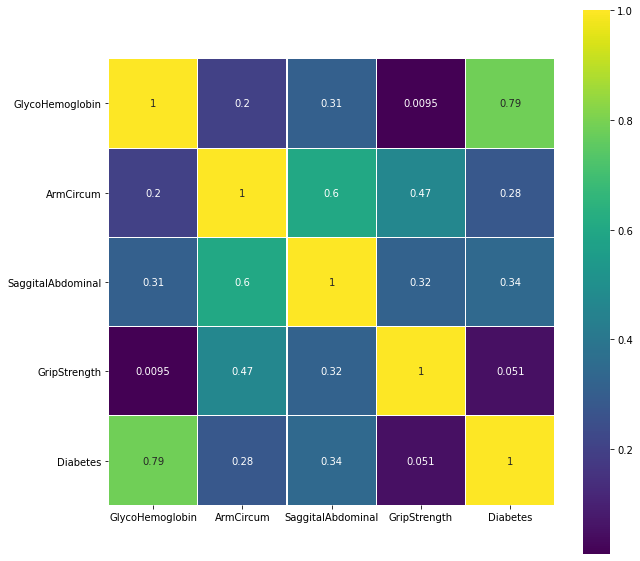

In [13]:
colormap = plt.cm.viridis
plt.figure(figsize=(10,10))
sns.heatmap(df.astype(float).corr(), linewidths=0.1, vmax=1.0, square=True, cmap=colormap, annot=True)

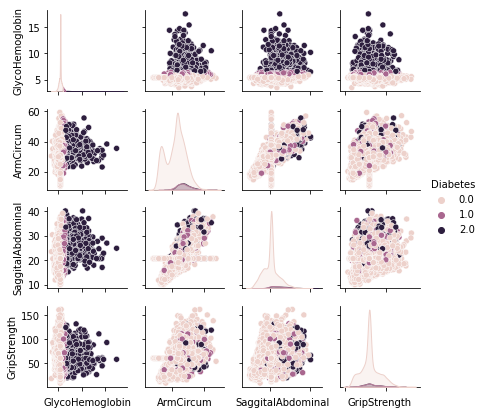

In [14]:
show = sns.pairplot(df, hue='Diabetes', size=1.5, diag_kind='kde')

show.set(xticklabels=[])

In [15]:
from sklearn import linear_model
from sklearn.svm import SVC
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, r2_score

In [16]:
df.drop(['GlycoHemoglobin'], axis = 1, inplace=True)

df.head(5)
df

,ArmCircum,SaggitalAbdominal,GripStrength,Diabetes
0,35.3,20.6,55.2,2.0
1,34.7,24.4,61.5,2.0
2,33.5,25.6,91.0,2.0
3,21.0,14.9,32.2,0.0
4,25.2,20.7,30.9,0.0
...,...,...,...,...
9808,29.9,19.1,70.1,0.0
9809,14.7,20.7,60.3,0.0
9810,37.0,24.3,46.6,0.0
9811,19.0,20.7,20.8,0.0


In [17]:
#data -> attributes, target -> diabetes
data = df.drop(['Diabetes'], axis=1)
target = df[['Diabetes']]

#seperate training set and test set
train_X = data[:6000]
test_X = data[6000:]
train_Y = target[:6000]
test_Y = target[6000:]

#create linear regression obj
lr_regr = linear_model.LinearRegression()

#training via linear regression model
lr_regr.fit(train_X, train_Y)

#make prediction using the test set
lr_pred_diabetes = lr_regr.predict(test_X)
lr_score = lr_regr.score(test_X, test_Y)

print('LRr_Coefficients: ', lr_regr.coef_)
print('LR_Mean Square Error: %.2f' % mean_squared_error(test_Y, lr_pred_diabetes))
print('LR_Variance score: %.2f' % r2_score(test_Y, lr_pred_diabetes))
print('Score: %.2f' % lr_regr.score(test_X, test_Y))


LRr_Coefficients:  [[ 0.01118066  0.03576526 -0.00301398]]
LR_Mean Square Error: 0.23
LR_Variance score: 0.12
Score: 0.12


In [18]:
from sklearn.cluster import KMeans

In [19]:
kms = KMeans(n_clusters = 3, tol = 0.0005, algorithm="auto")

kms.fit_predict(train_X)

print ("parameters: ", kms.get_params)
print ("preict: ", kms.predict)
print ("\nscore: %.2f" % kms.score(test_X))

parameters:  <bound method BaseEstimator.get_params of KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0005, verbose=0)>
preict:  <bound method KMeans.predict of KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0005, verbose=0)>

score: -529332.36


In [20]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

#create adaboost classification obj
ab_clf = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=100, 
                            learning_rate=0.5, random_state=100)

#training via adaboost classficiation model
ab_clf.fit(train_X, train_Y)
print("training....\n")

#make prediction using the test set
ab_pred_diabetes = ab_clf.predict(test_X)
print('prediction: \n', ab_pred_diabetes)

print('\nparms: \n', ab_clf.get_params)

#predict probability
#print('predict probability: %.2f' % ab_clf.staged_score(test_X, ab_pred_diabetes))

#score
ab_clf_score = ab_clf.score(test_X, test_Y)
print("\nmean accuracy: %.2f" % ab_clf.score(test_X, test_Y))

training....

prediction: 
 [0. 0. 0. ... 0. 0. 0.]

parms: 
 <bound method BaseEstimator.get_params of AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                         class_weight=None,
                                                         criterion='gini',
                                                         max_depth=None,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0

In [21]:
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier

In [22]:
bagging = BaggingClassifier(base_estimator= DecisionTreeClassifier(), max_samples = 0.5, max_features = 0.5, 
                            bootstrap = False, bootstrap_features = False)

bagging.fit(train_X, train_Y)
bg_pred_diabetes = bagging.predict(test_X)

bg_dt_score = bagging.score(test_X, test_Y)
bagging.score(test_X, test_Y)

0.8788355625491738

In [23]:
bagging = BaggingClassifier(base_estimator= KNeighborsClassifier(), max_samples = 0.5, max_features = 0.5, 
                            bootstrap = False, bootstrap_features = False)

bagging.fit(train_X, train_Y)
bg_pred_diabetes = bagging.predict(test_X)

bg_score = bagging.score(test_X, test_Y)
bagging.score(test_X, test_Y)

0.8806713873590348

In [24]:
from sklearn.neural_network import MLPClassifier

In [25]:
mlp = MLPClassifier(hidden_layer_sizes=(1000, 300, 300), solver='adam', shuffle=False, tol = 0.0001)

mlp.fit(train_X, train_Y)
mlp_pred_diabetes = mlp.predict(test_X)

print("parameter: ", mlp.get_params())

mlp_score = mlp.score(test_X, test_Y)
mlp.score(test_X, test_Y)

parameter:  {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (1000, 300, 300), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': None, 'shuffle': False, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


0.8780487804878049

In [26]:
d = {'Model': ['Linear Regression', 'Adaboost', 'Bagging_decision tree based', 'Bagging_KNeighbors', 'MLP'],
     'accuracy' : [lr_score, ab_clf_score, bg_dt_score, bg_score, mlp_score]}

result_df = pd.DataFrame(data = d)
result_df

,Model,accuracy
0,Linear Regression,0.123966
1,Adaboost,0.847364
2,Bagging_decision tree based,0.878836
3,Bagging_KNeighbors,0.880671
4,MLP,0.878049


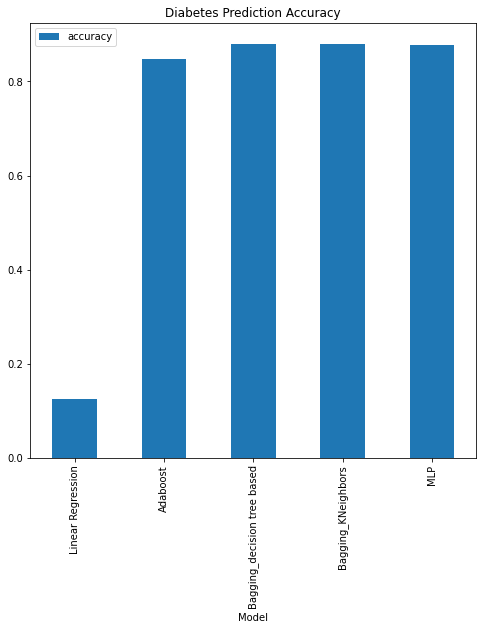

In [27]:
result_df.plot(x='Model', y='accuracy', kind='bar', figsize=(8, 8), title='Diabetes Prediction Accuracy', 
               sort_columns=True)